<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файлов-с-данными-и-изучение-общей-информации" data-toc-modified-id="Открытие-файлов-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файлов с данными и изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Исправление-ошибок-в-данных" data-toc-modified-id="Исправление-ошибок-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исправление ошибок в данных</a></span></li><li><span><a href="#Расчёт-необходимых-показателей" data-toc-modified-id="Расчёт-необходимых-показателей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Расчёт необходимых показателей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-показателей-по-тарифам-и-их-распределение" data-toc-modified-id="Рассмотрение-показателей-по-тарифам-и-их-распределение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассмотрение показателей по тарифам и их распределение</a></span></li><li><span><a href="#Расчет-среднего,-дисперсии-и-стандартного-отклонения" data-toc-modified-id="Расчет-среднего,-дисперсии-и-стандартного-отклонения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет среднего, дисперсии и стандартного отклонения</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

**Описание проекта**  

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам компании предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**  

*Тариф «Смарт»*  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

*Тариф «Ультра»*  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей    

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

##  Открытие файлов с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import warnings

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
for df in [calls, internet, messages, tariffs, users]:
    display(df.head())
    print()
    print(df.info())
    print('=' * 100)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Во всех таблицах практически все столбцы заполнены. Только в таблице с пользователями столбец - churn_date имеет мало значений, но в задании к проекту сказано: churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), - так, что здесь тоже скорее всего всё в порядке. Необходимо поменять тип данных на DataTime, где присутствуют даты, и некоторые числовые данные поменять на int. Проанализируем таблицы на корректность имеющихся в них  данных и дубликаты.

##  Подготовка данных

###  Исправление ошибок в данных

**Таблица users**

Посчитаем уникальных пользователей в таблице users.

In [4]:
print('Номер первого пользователя', users.user_id.min())
print('Номер последнего пользователя', users.user_id.max())
print('Количество уникальных пользователей = ', users.user_id.nunique())

Номер первого пользователя 1000
Номер последнего пользователя 1499
Количество уникальных пользователей =  500


Столбец корректный. Имеется 500 уникальных пользователей, упорядоченных от 1000 до 1499.  

Проверим возраст пользователей.

In [5]:
users.age.describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Столбец с возрастом заполнен корректно. Самому молодому пользователю 18 лет, самому старшему - 75 лет.  

В столбце 'churn_date' поменяем тип данных на datetime64.

In [6]:
users.churn_date = pd.to_datetime(users.churn_date, format='%Y-%m-%d')

В столбце 'reg_date' поменяем тип данных на datetime64.

In [7]:
users.reg_date = pd.to_datetime(users.reg_date, format='%Y-%m-%d')
warnings.filterwarnings("ignore")
users.reg_date.describe() 

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

Все даты регистрации укладываются в 2018 год с 1 января по 31 декабря.  

Проверим какие значения есть в столбце с тарифами.

In [8]:
users.tariff.value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Все верно, имеется только два тарифа: смарт и ультра. Причем тарифом смарт пользуется количество людей более чем в 2 раза превышающее пользователей тарифа ультра.  

Теперь проверим таблицу на дубликаты.

In [9]:
print('Количество дубликатов - ', users.duplicated().sum())

Количество дубликатов -  0


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Таблица подготовлена к дальнейшей работе.

**Таблица calls**  

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Проверим уникальность совершенных звонков по их id.

In [12]:
calls.id.value_counts()

1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

Каждый звонок уникален. Количество уникальных строк равно общему количеству строк в таблице.

В столбце с датой звонка поменяем тип данных на datetime.

In [13]:
calls.call_date = pd.to_datetime(calls.call_date, format='%Y-%m-%d')

Проверим значения столбца с длительностью звонков.

In [14]:
calls.duration.describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Значения выглядят правдоподобно. Имеются вызовы с нулевой продолжительность - это, скорее всего, пользователь не дозвонился или произведен сброс звонка. Так как в тарифах установлена поминутная тарификация, то округлим значения стобца до целых минут в большую сторону.

In [15]:
def ceil_value(value):
    '''Функция принимает значение в виде десятичной дроби, 
    и возвращает в виде целого числа, с округлением в 
    большую сторону'''
    return math.ceil(value)

calls['duration'] = calls['duration'].apply(ceil_value)

Проверим столбец 'users_id'

In [16]:
print('Номер первого пользователя', calls.user_id.min())
print('Номер последнего пользователя', calls.user_id.max())
print('Количество уникальных пользователей = ', calls.user_id.nunique())

Номер первого пользователя 1000
Номер последнего пользователя 1499
Количество уникальных пользователей =  492


Судя по последнему номеру пользователя, их количество совпадает с таблицей users, но имеется 8 человек, которые не совершали звонков за целый год. Вероятно, они пользуются только интернетом. Посмотрим на этих пользователей.

In [17]:
not_call = []
for i in users['user_id']:
    if i not in calls['user_id'].unique(): 
        not_call.append(i) 
print(not_call)

[1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]


In [18]:
users[users['user_id'].isin([1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489])]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [19]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Таблица подготовлена к дальнейшей работе.

**Таблица messages**

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Проверим уникальность отправленных сообщений по их id.

In [21]:
messages.id.value_counts()

1000_0      1
1344_248    1
1344_96     1
1344_95     1
1344_94     1
           ..
1174_352    1
1174_351    1
1174_350    1
1174_349    1
1499_183    1
Name: id, Length: 123036, dtype: int64

Каждое сообщение уникально. Количество уникальных строк равно общему количеству строк в таблице.  

В столбце с датой отправки сообщения поменяем тип данных на datetime.

In [22]:
messages.message_date = pd.to_datetime(messages.message_date, format='%Y-%m-%d')

Проверим столбец 'users_id'

In [23]:
print('Номер первого пользователя', messages.user_id.min())
print('Номер последнего пользователя', messages.user_id.max())
print('Количество уникальных пользователей = ', messages.user_id.nunique())

Номер первого пользователя 1000
Номер последнего пользователя 1499
Количество уникальных пользователей =  426


Снова видим, что количество пользователей 500 человек с номером id от 1000 до 1499, но 74 человека не пользовались за 2018 год услугой по отправке SMS.

In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Таблица подготовлена к дальнейшей работе.

**Таблица internet**

In [25]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице присутствует безымянный столбец, который дублирует индексы. Удалим его, так как он не понадобится в дальнейшей работе.

In [26]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

Проверим уникальность интернет-сессий по их id.

In [27]:
internet.id.value_counts()

1000_0      1
1333_109    1
1334_0      1
1334_1      1
1334_2      1
           ..
1172_80     1
1172_81     1
1172_82     1
1172_83     1
1499_156    1
Name: id, Length: 149396, dtype: int64

Каждая интернет-сессия уникальна. Количество уникальных строк равно общему количеству строк в таблице.  

Проверим значения столбца с объемом интернет-трафика.

In [28]:
internet.mb_used.describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Данные выглядят реалистично. Имеется минимальное значение 0 Мб, но это, скорее всего, прерванное соединение.  
Так как компания «Мегалайн» всегда округляет вверх значения мегабайтов, то округлим в большую сторону все значения столбца и поменяем тип на целочисленный.

In [29]:
internet['mb_used'] = internet['mb_used'].apply(ceil_value)

В столбце с датой интернет-сессии поменяем тип данных на datetime.

In [30]:
internet.session_date = pd.to_datetime(internet.session_date, format='%Y-%m-%d')

Проверим столбец 'users_id'

In [31]:
print('Номер первого пользователя', internet.user_id.min())
print('Номер последнего пользователя', internet.user_id.max())
print('Количество уникальных пользователей = ', internet.user_id.nunique())

Номер первого пользователя 1000
Номер последнего пользователя 1499
Количество уникальных пользователей =  497


Количество пользователей 500 человек. Трое абонентов в 2018 году не пользовались интернетом.

In [32]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


Таблица подготовлена к дальнейшей работе.

**Таблица tariffs**

In [33]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица заполнена корректно. Типы данных изменять не нужно.

### Расчёт необходимых показателей

Чтобы рассчитать для каждого пользователя траты на связь по месяцам, создадим сводные таблицы, предварительно добавив в первоначальные таблицы столбец с номером месяца.

In [34]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [35]:
calls_monthly = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
calls_monthly.columns = ['user_id', 'month', 'calls', 'minutes']

messages_monthly = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_monthly.columns = ['user_id', 'month', 'messages']

internet_monthly = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_monthly.columns = ['user_id', 'month', 'traffic']

display(calls_monthly.head(), messages_monthly.head(), internet_monthly.head())

,user_id,month,calls,minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


,user_id,month,traffic
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Для подсчета помесячной выручки с каждого пользователя, создадим объединенную таблицу stat, в которую войдут все траты на связь каждого пользователя. Затем добавим в эту таблицу столбец 'income' с помесячной выручкой.

In [36]:
# создадим таблицу stat, объединяя таблицы методом merge
stat = pd.merge(calls_monthly, messages_monthly, how='outer', on=['user_id', 'month'])
stat = pd.merge(stat, internet_monthly, how='outer', on=['user_id', 'month'])
stat = pd.merge(stat, users, how='outer', on='user_id')
stat

,user_id,month,calls,minutes,messages,traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Проверим пропуски в объединенной таблице.

In [37]:
stat.isna().sum()

user_id          0
month            2
calls           42
minutes         42
messages       499
traffic         13
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Пропуски в звонках, минутах, сообщениях и трафике понятны - это не использование услуги в конкретном месяце. Данные пропуски заменим на ноль. Но имеется два пропуска в столбце с номером месяца. Проверим с чем это связано.

In [38]:
display(stat[stat['month'].isna()])

,user_id,month,calls,minutes,messages,traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Дата регистрации показывает, что тариф приобрели в конце года. Значит заменим пропуск на декабрь, т.е. номер 12.

In [39]:
stat.loc[:,['calls', 'minutes', 'messages', 'traffic']] = stat.loc[:,['calls', 'minutes', 'messages', 'traffic']].fillna(0)
stat.loc[:,['month']] = stat.loc[:,['month']].fillna(12)
stat.isna().sum()

user_id          0
month            0
calls            0
minutes          0
messages         0
traffic          0
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

По заданию помесячная выручка с каждого пользователя рассчитывается так: *вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану.* Для заполнения столбца 'income' создадим функцию.

In [40]:
def income_monthly(table):
    ''' Функция income_monthly рассчитывает помесячную выручку.
    Под каждый тариф создано условие, в соответствии с которым
    функция сначала считает выручку от каждого услуги, имеющейся 
    в тарифе, а затем, путем сложения, возвращает общую выручку'''
        
    if table['tariff'] == 'smart':
        
        inc_calls = (table['minutes'] - tariffs.loc[0,'minutes_included']) * tariffs.loc[0,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_messages = (table['messages'] - tariffs.loc[0,'messages_included']) * tariffs.loc[0,'rub_per_message']
        if inc_messages < 0 :
            inc_messages = 0
            
        # так в тарифе учет интернет трафика идет в Гб, то разделим Мб на 1024
        inc_traffic  = (table['traffic'] - tariffs.loc[0,'mb_per_month_included'])/1024 * tariffs.loc[0,'rub_per_gb'] 
        if inc_traffic < 0 :
            inc_traffic = 0
             
        income = inc_calls + inc_messages + inc_traffic + tariffs.loc[0,'rub_monthly_fee']
        
    elif table['tariff'] == 'ultra':
        
        inc_calls = (table['minutes'] - tariffs.loc[1,'minutes_included']) * tariffs.loc[1,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_messages = (table['messages'] - tariffs.loc[1,'messages_included']) * tariffs.loc[1,'rub_per_message']
        if inc_messages < 0 :
            inc_messages = 0
        
        inc_traffic  = (table['traffic'] - tariffs.loc[1,'mb_per_month_included'])/1024 * tariffs.loc[1,'rub_per_gb'] 
        if inc_traffic < 0 :
            inc_traffic = 0
             
        income = inc_calls + inc_messages + inc_traffic + tariffs.loc[1,'rub_monthly_fee']
        
    else:
        print('Ошибка')
        
    
    return income

stat['income'] = stat.apply(income_monthly, axis=1)

In [41]:
stat.sample(5)

,user_id,month,calls,minutes,messages,traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,income
1731,1277,8.0,32.0,185.0,131.0,23950.0,30,NaT,Новосибирск,Валерия,Андреенко,2018-02-19,ultra,1950.000000
3117,1490,5.0,56.0,339.0,37.0,21362.0,30,NaT,Москва,Радомир,Алесин,2018-04-03,smart,1722.265625
34,1005,5.0,73.0,595.0,42.0,7877.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,835.000000
1143,1180,6.0,9.0,31.0,25.0,28177.0,27,NaT,Москва,Лев,Мишин,2018-02-02,ultra,1950.000000
1327,1210,7.0,11.0,72.0,0.0,2046.0,33,NaT,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart,550.000000


Округлим значения выручки до целого значения, так как оба тарифа предполагают оплату минут и мегабайтов, округленных до целого числа. После выполненных операций, в таблице изменились типы данных, устраним этот недочет.

In [42]:
stat.income = stat.income.apply(ceil_value)
stat = stat.astype({'month': 'int64',
                   'calls': 'int64',
                   'minutes': 'int64',
                   'messages': 'int64',
                   'traffic': 'int64'})

In [43]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3216 non-null   int64         
 1   month       3216 non-null   int64         
 2   calls       3216 non-null   int64         
 3   minutes     3216 non-null   int64         
 4   messages    3216 non-null   int64         
 5   traffic     3216 non-null   int64         
 6   age         3216 non-null   int64         
 7   churn_date  189 non-null    datetime64[ns]
 8   city        3216 non-null   object        
 9   first_name  3216 non-null   object        
 10  last_name   3216 non-null   object        
 11  reg_date    3216 non-null   datetime64[ns]
 12  tariff      3216 non-null   object        
 13  income      3216 non-null   int64         
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 376.9+ KB


### Вывод

В ходе предобработки данных сохранен полный объем предоставленной информации. Был изменен тип данных на datetime в столбцах с информацией о датах: совершенного звонка, отправленного сообщения и интернет-сессии. Округлены в большую сторону(такие условия тарифа) данные о продолжительности звонка и объему интернет-трафика. Сгруппировал данные в 3 таблицы: calls_monthly, messages_monthly, internet_monthly и посчитал помесячную выручку с каждого пользователя. Путем объединения таблиц создал общую таблицу stat - в которую сгруппировал данные по каждому абоненту за каждый месяц пользования. Заполнили образовавшиеся пропуски. Рассчитал помесячную выручку за 2018 год для каждого пользователя.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Разберемся сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

### Рассмотрение показателей по тарифам и их распределение

Создадим две сводные таблицы, в которых показатели будут разделены по тарифам.

In [44]:
all_stat = stat.groupby(['tariff', 'month'])['minutes', 'messages', 'traffic', 'income'].sum().reset_index()
smart = all_stat.query(' tariff=="smart" ')
ultra = all_stat.query(' tariff=="ultra" ').reset_index(drop=True)
print('<' * 16, 'Тариф "СМАРТ"', '>' * 16)
display(smart)
print('<' * 16, 'Тариф "УЛЬТРА"', '>' * 16)
display(ultra)

<<<<<<<<<<<<<<<< Тариф "СМАРТ" >>>>>>>>>>>>>>>>


,tariff,month,minutes,messages,traffic,income
0,smart,1,6931,620,289831,23890
1,smart,2,17324,1397,673461,46659
2,smart,3,30034,2453,1164537,86136
3,smart,4,41119,3443,1509702,103325
4,smart,5,54618,4762,2231353,161749
5,smart,6,64885,5478,2593622,188575
6,smart,7,82079,6784,3168466,234839
7,smart,8,99045,7905,3908561,295817
8,smart,9,111439,8746,4244377,311832
9,smart,10,125284,9927,4932898,383717


<<<<<<<<<<<<<<<< Тариф "УЛЬТРА" >>>>>>>>>>>>>>>>


,tariff,month,minutes,messages,traffic,income
0,ultra,1,3853,304,118382,17550
1,ultra,2,7131,527,282887,47354
2,ultra,3,18117,1195,649423,74156
3,ultra,4,25191,1736,926409,109751
4,ultra,5,34192,2536,1298540,137684
5,ultra,6,40295,3505,1591148,170696
6,ultra,7,49667,4536,1866833,191881
7,ultra,8,54653,5183,2096565,221620
8,ultra,9,62036,6013,2210554,231586
9,ultra,10,68644,7187,2467856,253009


С помощью столбчатых диаграмм визуально оценим изменение общих показателей.

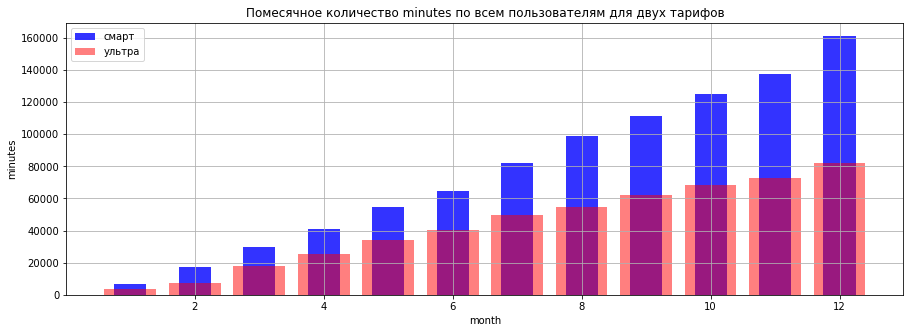

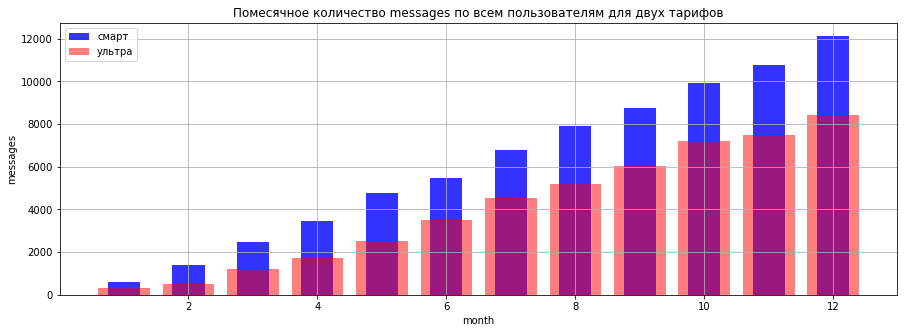

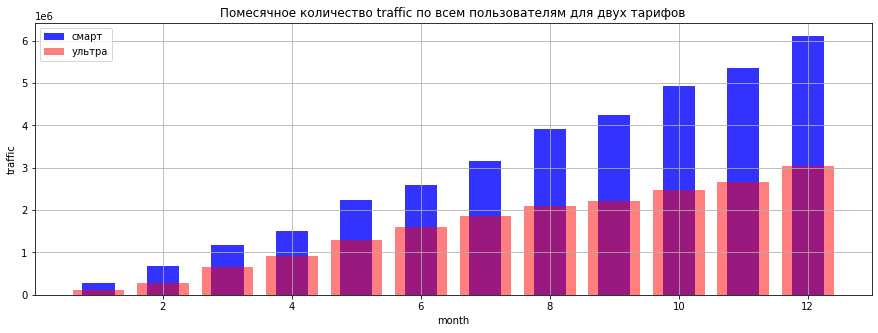

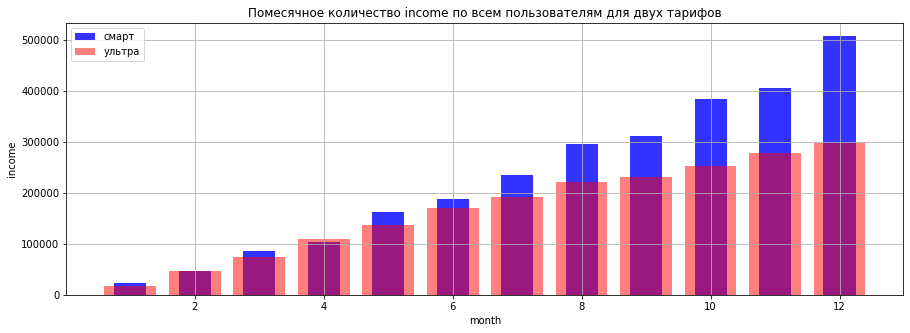

In [45]:
for value in ['minutes', 'messages', 'traffic','income']:
    plt.figure(figsize=(15, 5))
    plt.bar(smart['month'], smart[value], label='смарт', color='b', alpha=0.8, width=0.5)
    plt.bar(ultra['month'], ultra[value], label='ультра', color='r', alpha=0.5, width=0.8)
    plt.xlabel('month')
    plt.ylabel(value)
    plt.grid()
    plt.title(f'Помесячное количество {value} по всем пользователям для двух тарифов')
    plt.legend()
    plt.show();

**Анализируя графики, можно сказать следующее.** 

Последоватедьно, месяц за месяцем, траты на обоих тарифах росли, так как происходил приток новых клиентов. Заметно, что суммарные траты (минуты, SMS, интернет) всех пользователей тарифа 'Смарт' превышает аналогичные показатели тарифа 'Ультра' более чем на 50 %, но нам известно, что и пользователей тарифом 'Смарт' в два с небольшим раза больше, чем на тарифе 'Ультра'. График по выручке имеет некоторые особенности: за первые 4 месяца абоненты обоих тарифов принесли компании "Мегалайн" практически одинаковые суммы, но, начиная с мая, пользователи 'Смарт' с каждым месяцем стали приносить выручки больше и в декабре выручка от 'Смарт' превысила выручку от 'Ультра' примерно на 40 %. Но нужно проверить, сколько платит в среднем один пользователь за год. 

In [46]:
smart_income = smart['income'].sum()
ultra_income = ultra['income'].sum()
print(f'Выручка тарифа "Смарт" за 2018 год = {smart_income} рублей, а в среднем за год один клиент заплатил {round(smart_income/351)} рублей')
print(f'Выручка тарифа "Ультра" за 2018 год = {ultra_income} рублей, а в среднем за год один клиент заплатил {round(ultra_income/149)} рублей')

Выручка тарифа "Смарт" за 2018 год = 2750336 рублей, а в среднем за год один клиент заплатил 7836 рублей
Выручка тарифа "Ультра" за 2018 год = 2031640 рублей, а в среднем за год один клиент заплатил 13635 рублей


Как видим в целом за год выручка от тарифа "Смарт" превысила выручку от тарифа "Ультра" примерно на 26 %, но количество абонентов у "Смарт", как мы помним, больше в 2 с небольшим раза. Делаем вывод, что компании "Мегалайн" для значительного повышения выручки, нужно больше привлекать клиентов на тариф "Ультра".

С помощью гистограмм узнаем распределение пользователей в рассматриваемых параметрах.

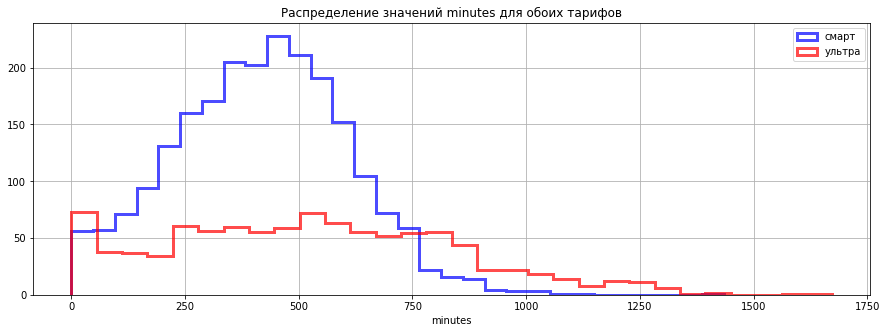

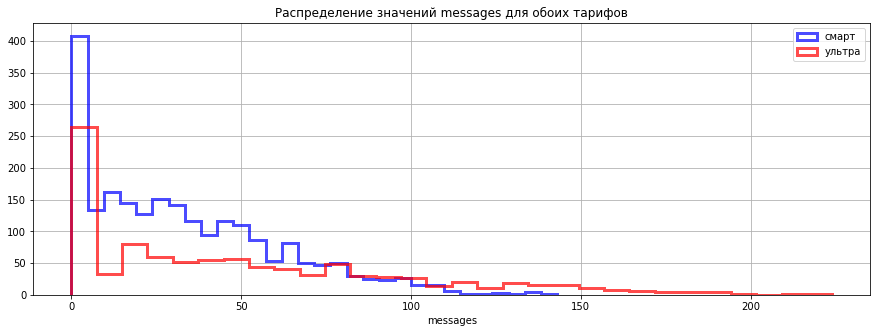

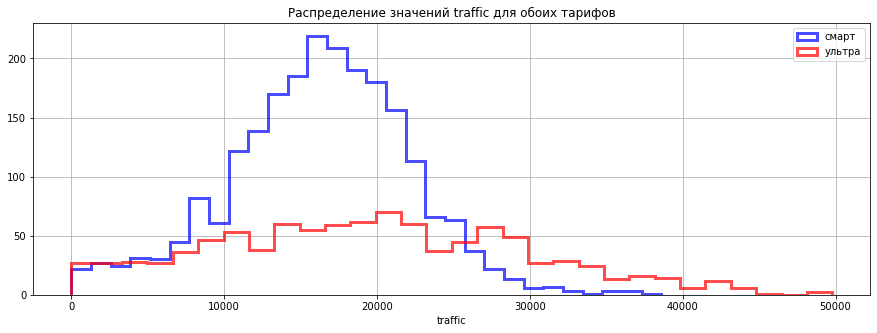

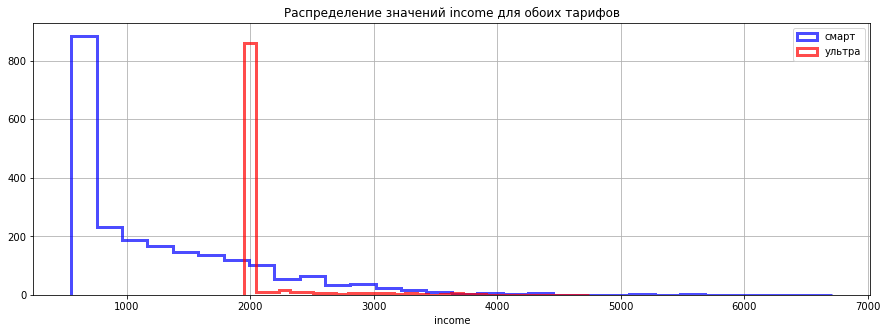

In [47]:
for value in ['minutes', 'messages', 'traffic','income']:
    plt.figure(figsize=(15, 5))
    
    plt.hist(stat.loc[stat['tariff'] == "smart", value], histtype='step', label='смарт', color='b', alpha=0.7, linewidth=3, bins = 30)
    plt.hist(stat.loc[stat['tariff'] == "ultra", value], histtype='step', label='ультра', color='r', alpha=0.7, linewidth=3, bins = 30)
    plt.xlabel(value)
    plt.grid()
    plt.title(f'Распределение значений {value} для обоих тарифов')
    plt.legend()
    plt.show();

**Анализируя распределения, отметим следующее:**

*тариф "Смарт"*
- минуты разговора имеют нормальное распределение и основная доля пользователей стремится разговаривать по телефону как раз около 500 минут, предоставляемых по тарифу, но есть часть клиентов не укладывается в предоставляемый лимит;
- SMS выглядят как распределение Пуассона. Ярко выражено количество пользователей, которые отправили всего около 10 сообщений за весь рассматриваемый период. Думаю, это какие-нибудь sms-поздравления;
- использование интернета также имеет нормальное распределение, основная масса клиентов старается уместится в предоставленные 15 Гб, хотя имеется слабая скошенность вправо, значит предоставленного объема интернет-трафика клиентам не хватает;
- выручка имеет вид распределения Пуассона, выделяется доля клиентов, укладывающихся в установленные тарифом 550 рублей, но имеется и достаточное количество людей, которые платят сверх установленного тарифным планом.

*тариф "Ультра"*  
- израсходованные минуты имеют вид распределения Пуассона. Примерно равное количество людей расходует минуты в диапазоне от 0 до 850, далее наблюдается хвост. Лимит по минутам на тарифе большой, поэтому клиенты не беспокоятся;
- ситуация с сообщениями аналогична тарифу "Смарт";
- использование интернета похоже на "разглаженное" нормальное распределение. Основная доля использует около 21 Гб, большинство укладывается в предоставляемые тарифом 30 ГБ, но есть те, кому и этого объема не хватает;
- выручка имеет вид распределения Пуассона, основная доля клиентов платит установленные тарифом 1950 рублей.

### Расчет среднего, дисперсии и стандартного отклонения

Для более полной картины необходимо установить и проанализировать усредненные показатели по обоим тарифам.  

Посмотрим сперва на помесячные средние показатели обоих тарифов.

In [48]:
mean_stat = stat.groupby(['tariff', 'month'])['minutes', 'messages', 'traffic','income'].mean().reset_index()
mean_smart = mean_stat.query('tariff=="smart"')
mean_ultra = mean_stat.query('tariff=="ultra"').reset_index(drop=True)
print('<' * 20, 'Тариф "СМАРТ"', '>' * 20)
display(mean_smart)
print('<' * 20, 'Тариф "УЛЬТРА"', '>' * 20)
display(mean_ultra)

<<<<<<<<<<<<<<<<<<<< Тариф "СМАРТ" >>>>>>>>>>>>>>>>>>>>


,tariff,month,minutes,messages,traffic,income
0,smart,1,203.852941,18.235294,8524.441176,702.647059
1,smart,2,298.689655,24.086207,11611.396552,804.465517
2,smart,3,390.051948,31.857143,15123.857143,1118.649351
3,smart,4,367.133929,30.741071,13479.482143,922.544643
4,smart,5,387.361702,33.773050,15825.198582,1147.156028
5,smart,6,395.640244,33.402439,15814.768293,1149.847561
6,smart,7,408.353234,33.751244,15763.512438,1168.353234
7,smart,8,421.468085,33.638298,16632.174468,1258.795745
8,smart,9,428.611538,33.638462,16324.526923,1199.353846
9,smart,10,426.136054,33.765306,16778.564626,1305.159864


<<<<<<<<<<<<<<<<<<<< Тариф "УЛЬТРА" >>>>>>>>>>>>>>>>>>>>


,tariff,month,minutes,messages,traffic,income
0,ultra,1,428.111111,33.777778,13153.555556,1950.000000
1,ultra,2,297.125000,21.958333,11786.958333,1973.083333
2,ultra,3,489.648649,32.297297,17551.972973,2004.216216
3,ultra,4,458.018182,31.563636,16843.800000,1995.472727
4,ultra,5,510.328358,37.850746,19381.194030,2054.985075
5,ultra,6,479.702381,41.726190,18942.238095,2032.095238
6,ultra,7,545.791209,49.846154,20514.648352,2108.582418
7,ultra,8,510.775701,48.439252,19594.065421,2071.214953
8,ultra,9,539.443478,52.286957,19222.208696,2013.791304
9,ultra,10,558.081301,58.430894,20063.869919,2056.983740


Теперь узнаем сколько в среднем в месяц составляет конкретный показатель на обоих тарифах, и округлим его до целого числа.

In [49]:
for value in ['minutes', 'messages', 'traffic', 'income']:
    print(f'Среднее количество {value} на тарифе "смарт" = {round(mean_smart[value].mean())}, а на тарифе "ультра" = {round(mean_ultra[value].mean())}')

Среднее количество minutes на тарифе "смарт" = 387, а на тарифе "ультра" = 496
Среднее количество messages на тарифе "смарт" = 31, а на тарифе "ультра" = 44
Среднее количество traffic на тарифе "смарт" = 15073, а на тарифе "ультра" = 18210
Среднее количество income на тарифе "смарт" = 1130, а на тарифе "ультра" = 2039


Для удобства соберём в единую таблицу статистические показатели: среднее, дисперсию и стандартное отклонение.

In [50]:
mean_stat = pd.DataFrame(columns = ['tariff', 'option', 'mean', 'var', 'std'])

index = 0
tarif = ['smart', 'ultra']
for value in ['minutes', 'messages', 'traffic', 'income']:
    tarif_index = 0
    for df in [mean_smart, mean_ultra]:
        mean_stat.loc[index, 'option'] = value
        mean_stat.loc[index, 'mean'] = round(df[value].mean())
        # так как данные являются выборкой, то используем параметр ddof=1
        mean_stat.loc[index, 'var'] = round(np.var(df[value], ddof=1)) 
        mean_stat.loc[index, 'std'] = round(np.std(df[value], ddof=1)) 
        mean_stat.loc[index, 'tariff'] = tarif[tarif_index]
        index +=1
        tarif_index +=1
print('<<<< Статистика по тарифам >>>>')
mean_stat

<<<< Статистика по тарифам >>>>


,tariff,option,mean,var,std
0,smart,minutes,387,5198,72
1,ultra,minutes,496,5925,77
2,smart,messages,31,26,5
3,ultra,messages,44,150,12
4,smart,traffic,15073,7124616,2669
5,ultra,traffic,18210,8831919,2972
6,smart,income,1130,49914,223
7,ultra,income,2039,2880,54


**Помня правило трех сигм и принимая за математическое ожидание средние значения показателей можно сделать следующие выводы:**

*тариф "Смарт":*
- рассчитав крайнюю правую границу по минутам (387 + 72 * 3 = 603), получаем разницу с лимитом в 103 минуты, и умножив это значение на 3 (столько стоит одна минута разговора сверх лимита) получаем переплату в 309 рублей - с такой переплатой, еще нет смысла переходить на тариф "Ультра";
- перерасходы по сообщениям на тарифе крайне редки;
- учитывая округление Гб по условиям тарифа, то среднее значение объема трафика на тарифе составит 16 Гб, а это уже переплата на 200 рублей. Исходя из правила трех сигм, крайняя граница составит 25 Гб, а это переплата уже на 1800 рублей (по условию 1 Гб сверх лимита стоит 200 рублей).
- Исходя из написанного выше и статистике по выручке, можно сказать, что в среднем переплачивают 580 рублей (стоимость тарифа 550 рублей). С большой увереностью можно сказать, что переплачивают активные интернет пользователи, и тем клиентам, которые перерасходуют более 6 Гб, следует перейти на тариф "Ультра".

In [51]:
change_smart = stat.query('tariff == "smart" and minutes > 550 and traffic > 21000').user_id.nunique()
change_smart

78

Количество клиентов, которым следовало бы перейти на тариф "Ультра" составляет 78 человек, а это примерно 22 % от общего числа пользователей тарифа "Смарт".

*тариф "Ультра":*
- исходя из статистических показателей, все клиенты укладываются в тарифный лимит по длительности звонков;
- израсходование по сообщениям также никакому клиенту не грозит;
- перерасходование лимита по интернет-трафику присутствует у малой части клиентов, и этим клиентам, я бы посоветовал найти безлимитный тариф;
- судя по среднему значению выручки, средняя переплата на тарифе составляет 89 рублей. Этому способствуют интернет пользователи, о которых было сказано выше;
- на тарифе имеются клиенты расходующие менее 500 минут и 15 Гб, и им следовало бы перейти на тариф "Смарт".

In [52]:
change_ultra = len(stat.query('tariff == "ultra" and minutes < 500 and messages < 50 and traffic < 15000').user_id.unique())
change_ultra

89

Количество клиентов, которым следовало бы перейти на тариф "Смарт" составляет 89 человек, а это почти 60 % от общего числа пользователей тарифа "Ультра". Но компании "Мегалайн" данный переход не выгоден.

## Проверка гипотез

**Проверка первой гипотезы**

Нулевая гипотеза формулируется так, чтобы был знак равенства. Поэтому сформулируем нулевую гипотезу $H_0$ как то, что средняя выручка тарифов «Ультра» и «Смарт» равны. Альтернативной гипотезой $H_1$ будет условие по заданию: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Применять будем метод scipy.stats.ttest_ind, в котором параметр equal_var = False, так как ранее уже установили что дисперсии тарифов отличаются

Критический уровень значимости зададим 0.05.

In [53]:
alpha = 0.05
results = st.ttest_ind(mean_smart['income'], mean_ultra['income'], equal_var = False)
print('P-value составляет:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value составляет: 8.457666151853618e-09
Отвергаем нулевую гипотезу


**Вывод по первой гипотезе.**  

Столь маленькое p-value говорит о том, что вероятность случайного совпадения средних наших выборок крайне мала. Поэтому нулевая гипотеза отвергается, а альтернативная гипотеза подтверждается и условие, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, выполняется.

**Проверка второй гипотезы**

Сперва сформулируем нулевую и альтернативную гипотезы:

$H_0$ - средняя выручка пользователей из Москвы и остальных регионов равна.  
$H_1$ - средняя выручка пользователей из Москвы и остальных регионов не равна.  

Для проверки гипотезы необходимо создать двa массива данных: moscow - в которой будут абоненты обоих тарифов из Москвы, и regions - в которой будут абоненты обоих тарифов из остальных регионов.

In [54]:
moscow = stat.query('city == "Москва"').groupby('user_id')['income'].mean().values
regions = stat.query('city != "Москва"').groupby('user_id')['income'].mean().values

In [55]:
print(f'''Дисперсия moscow = {np.var(moscow)}, 
Дисперсия regions = {np.var(regions)}''')

Дисперсия moscow = 361922.2929841319, 
Дисперсия regions = 412226.6974271358


Опять же применять будем метод scipy.stats.ttest_ind, в котором параметр equal_var = False, так как дисперсии выборок отличаются.

Критический уровень значимости зададим 0.05.

In [56]:
alpha = 0.05
results = st.ttest_ind(moscow, regions, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.3952139848785875
Не получилось отвергнуть нулевую гипотезу


**Вывод по второй гипотезе**  

Полученное p-value равно 0.39, а значит существует большая вероятность того, что отличие средних значений выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит о том, что средняя выручка пользователей из Москвы и остальных регионов равна. Альтернативную гипотезу о различии средней выручки пользователей из Москвы и остальных регионов отвергаем.

## Общий вывод

Для выполнения проекта были предоставлены пять таблиц с выборкой данных от телеком-компании "Мегалайн".  

В ходе предобработки данных был сохранен полный объем предоставленной информации. В целом, предоставленные данные были корретны. Был изменен тип данных на datetime в столбцах с информацией о датах: совершенного звонка, отправленного сообщения и интернет-сессии. В соответствии с заданием округлены в большую сторону данные о продолжительности звонка и объему интернет-трафика. Для подсчета помесячной выручки с каждого клиента сгруппировал данные в 3 таблицы: calls_monthly, messages_monthly, internet_monthly. Путем объединения таблиц создал общую таблицу stat - в которую сгруппировал данные по каждому абоненту за каждый месяц пользования. Заполнил образовавшиеся пропуски. Рассчитал помесячную выручку за 2018 год для каждого пользователя. 

В ходе анализа установлено:
- Последоватедьно, месяц за месяцем, траты на обоих тарифах росли, так как происходил приток новых клиентов;
- В тарифе "Смарт" большинство клиентов укладываются в лимит 500 минут разговора - среднее значение за 2018 год - 387 минут. В тарифе "Ультра" среднемесячное значение - 496 минут (лимит в 3000 минут никем не превышен);
- SMS-сообщения не популярная услуга на обоих тарифах. На тарифе "Смарт" лимит превышается редко, на тарифе "Ультра" - лимит не превышен никем;
- Предоставление интернет-трафика наоборот очень популярная услуга. На тарифе "Смарт" клиенты часто превышают лимит, и даже среднее значение использования (с округлением 16 Гб) превышает установленный лимит в 15 Гб. На тарифе "Ультра" лимит в 30 Гб превышен небольшой частью клиентов.
- Выручка абонентов "Ультра" в подавляющем большинстве случаев ограничивается ежемесячной платой 1950 рублей и в среднем превышается она на 89 рублей. Клиенты тарифа "Смарт" наоборот очень частенько платят сверх ежемесячной платы 550 рублей. Средняя переплата составляет 580 рублей. Основная причина переплаты - это перерасход интернет-трафика;
- Значения общей выручки за 2018 год: тариф "Смарт" - 2 750 336 рублей, тариф "Ультра" - 2 031 640 рублей. Но учитывая, что в среднем за год один абонент "Смарта" заплатил 7836 рублей, а абонент "Ультра" - 13635  рублей, и зная, что на тарифе "Смарт" довольно часто переплачивают за интернет, то тариф "Ультра" выглядит более перспективным и сотруднмкам "Мегалайна" стоит сфокусироваться на его продвижении. Есть как минимум 78 клиентов, которым данный переход будет выгоден.  

Проверены две гипотезы:
- Первая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - ПОДТВЕРДИЛАСЬ;
- Вторая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - НЕ ПОДТВЕРДИЛАСЬ.